In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 设置中文字体（以SimHei为例）
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 解决负号无法显示的问题

In [492]:
excel_file_path = '分类数据.xlsx'

data_1 = pd.read_excel(excel_file_path, sheet_name=0)

In [175]:
excel_file_path = '三年分类数据.xlsx'

data_1_full = pd.read_excel(excel_file_path, sheet_name=0)

In [ ]:
data_2 = pd.read_excel(excel_file_path, sheet_name=1)
data_3 = pd.read_excel(excel_file_path, sheet_name=2)
data_4 = pd.read_excel(excel_file_path, sheet_name=3)
data_5 = pd.read_excel(excel_file_path, sheet_name=4)
data_6 = pd.read_excel(excel_file_path, sheet_name=5)

# 以水生根茎类为例

In [187]:
data_1['利润'] = data_1['销量(千克)'] * data_1['利润率']
data_1

,销售日期,分类名称,单品名称,销量(千克),销售单价(元/千克),批发价格(元/千克),平均损耗率,利润率,利润
0,2022-06-30,水生根茎类,净藕(1),0.387,14.0,10.05,13.65,0.393035,0.152104
1,2022-06-30,水生根茎类,净藕(1),0.501,14.0,10.05,13.65,0.393035,0.196910
2,2022-06-30,水生根茎类,高瓜(1),0.258,14.0,7.62,13.65,0.837270,0.216016
3,2022-06-30,水生根茎类,净藕(1),0.437,14.0,10.05,13.65,0.393035,0.171756
4,2022-06-30,水生根茎类,净藕(1),0.301,14.0,10.05,13.65,0.393035,0.118303
...,...,...,...,...,...,...,...,...,...
20763,2023-06-30,水生根茎类,菱角,1.039,14.0,9.16,13.65,0.528384,0.548991
20764,2023-06-30,水生根茎类,菱角,0.745,14.0,9.16,13.65,0.528384,0.393646
20765,2023-06-30,水生根茎类,菱角,0.509,14.0,9.16,13.65,0.528384,0.268948
20766,2023-06-30,水生根茎类,菱角,0.172,14.0,9.16,13.65,0.528384,0.090882


In [188]:
grouped_data = data_1.groupby('单品名称').agg({'单品名称': 'count', '销量(千克)': 'sum','利润':'sum'})
grouped_data.columns = ['出现次数', '总销售量(千克)','总利润']
sorted_data = grouped_data.sort_values(by='出现次数', ascending=False)
sorted_data

,出现次数,总销售量(千克),总利润
单品名称,,,
净藕(1),11298,8208.984,4003.998603
洪湖莲藕(粉藕),3069,3116.000,1562.348120
高瓜(2),1223,284.105,2672.136691
洪湖藕带,1173,451.815,246.905790
高瓜(1),996,340.254,184.812993
野藕(1),764,392.694,193.340282
荸荠,672,391.095,226.505368
净藕(3),576,318.476,2148.300132
莲蓬(个),396,1913.000,1262.006576


In [26]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20768 entries, 0 to 20767
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   销售日期        20768 non-null  datetime64[ns]
 1   分类名称        20768 non-null  object        
 2   单品名称        20768 non-null  object        
 3   销量(千克)      20768 non-null  float64       
 4   销售单价(元/千克)  20768 non-null  float64       
 5   批发价格(元/千克)  20768 non-null  float64       
 6   平均损耗率       20768 non-null  float64       
 7   利润率         20768 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 1.3+ MB


## 清除异常值 

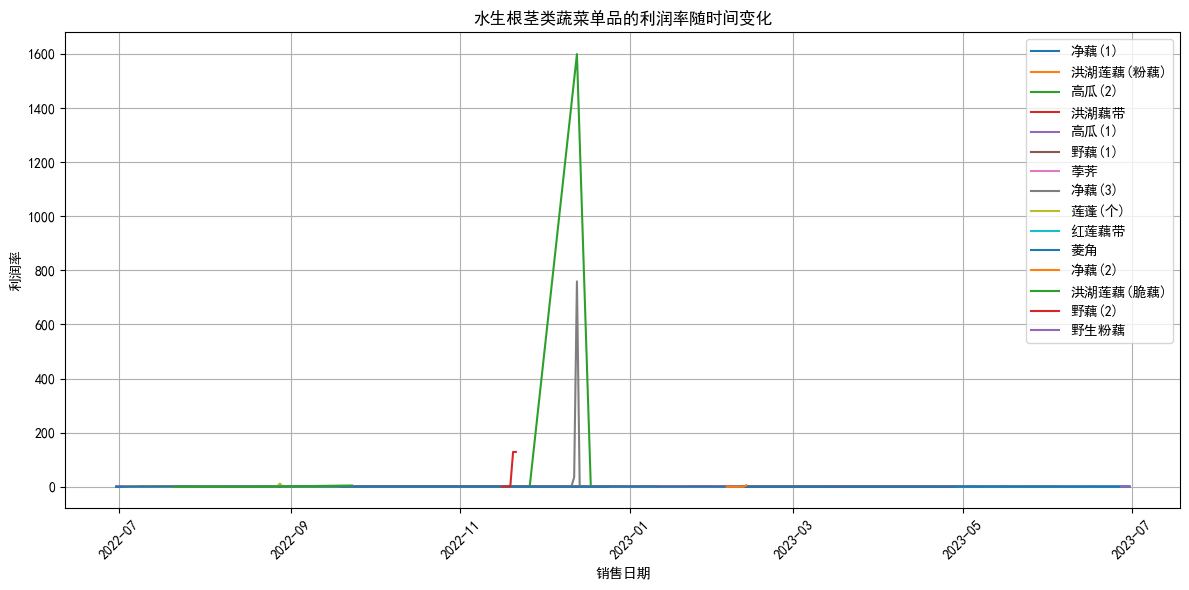

In [6]:
# 创建一个包含日期和利润率的DataFrame
profit_data = data_1[data_1['单品名称'].isin(sorted_data.index)][['销售日期', '单品名称', '利润率']]

# 绘制折线图
plt.figure(figsize=(12, 6))
for product in sorted_data.index:
    product_data = profit_data[profit_data['单品名称'] == product]
    plt.plot(product_data['销售日期'], product_data['利润率'], label=product)

plt.xlabel('销售日期')
plt.ylabel('利润率')
plt.title('水生根茎类蔬菜单品的利润率随时间变化')
plt.legend(loc='best')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

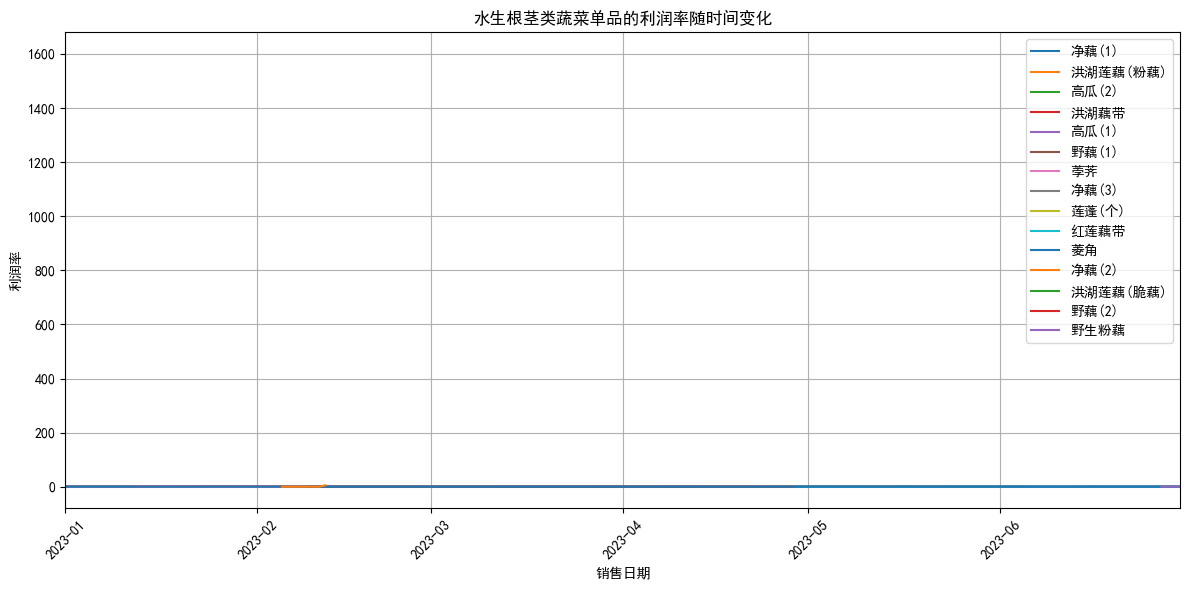

In [120]:
# 绘制折线图
plt.figure(figsize=(12, 6))
for product in sorted_data.index:
    product_data = profit_data[profit_data['单品名称'] == product]
    plt.plot(product_data['销售日期'], product_data['利润率'], label=product)

plt.xlabel('销售日期')
plt.ylabel('利润率')
plt.title('水生根茎类蔬菜单品的利润率随时间变化')
plt.legend(loc='best')
plt.grid(True)
plt.xticks(rotation=45)

# 设置x轴的范围为2023-04到2023-06
plt.xlim(pd.Timestamp('2023-01-01'), pd.Timestamp('2023-06-30'))

plt.tight_layout()
plt.show()

In [467]:
#截取2023-04-01到2023-06-30的数据
start_date = '2023-04-20'
end_date = '2023-06-30'

# 使用条件过滤选择指定日期范围的数据
data_1_filtered = data_1[(data_1['销售日期'] >= start_date) & (data_1['销售日期'] <= end_date)]
print(data_1_filtered.info())
print(data_1_filtered.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 355 entries, 1085 to 1439
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   销售日期    355 non-null    datetime64[ns]
 1   单品名称    355 non-null    object        
 2   利润率     355 non-null    float64       
 3   销量(千克)  355 non-null    float64       
 4   利润      355 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 16.6+ KB
None
              利润率      销量(千克)          利润
count  355.000000  355.000000  355.000000
mean     0.514662    2.839662    1.567638
std      0.184618    2.512450    1.758437
min      0.038961    0.117000    0.030364
25%      0.415178    0.959000    0.446206
50%      0.499014    2.084000    1.027150
75%      0.616872    4.080500    1.997051
max      1.985075   14.219000   11.732027


In [468]:
# 根据销售日期、单品名称和利润率分组
grouped = data_1.groupby(['销售日期', '单品名称', '利润率'])

# 计算每天相同单品名称和利润率的销量总和和利润总和
data_1 = grouped.agg({
    '销量(千克)': 'sum',  # 计算销量总和
    '利润': 'sum'  # 计算利润总和
}).reset_index()  # 重置索引，以获取新的DataFrame
data_1

,销售日期,单品名称,利润率,销量(千克),利润
0,2022-06-30,净藕(1),0.393035,6.648,2.612896
1,2022-06-30,洪湖藕带,0.504762,2.602,1.313390
2,2022-06-30,菱角,0.417183,0.150,0.062578
3,2022-06-30,高瓜(1),0.837270,1.225,1.025656
4,2022-07-01,净藕(1),0.520087,8.583,4.463906
...,...,...,...,...,...
1435,2023-06-30,洪湖藕带,0.444444,0.924,0.410667
1436,2023-06-30,红莲藕带,0.739130,0.721,0.532913
1437,2023-06-30,菱角,0.528384,3.396,1.794393
1438,2023-06-30,野生粉藕,0.618929,0.231,0.142973


In [469]:
# 定义一个函数来删除每个单品的异常值
def remove_outliers(group):
    q1 = group['利润率'].quantile(0.25)
    q3 = group['利润率'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return group[(group['利润率'] >= lower_bound) & (group['利润率'] <= upper_bound)]

# 使用groupby将数据按照单品名称分组，并应用remove_outliers函数
data_1_cleaned = data_1_filtered.groupby('单品名称').apply(remove_outliers)

# 重置索引以获得处理后的DataFrame
data_1_cleaned = data_1_cleaned.reset_index(drop=True)

In [470]:
data_1_cleaned.describe()

,利润率,销量(千克),利润
count,352.000000,352.00000,352.000000
mean,0.511743,2.82781,1.541187
std,0.166890,2.50555,1.686287
min,0.038961,0.11700,0.030364
25%,0.416121,0.96150,0.447284
50%,0.499100,2.05000,1.023663
75%,0.616872,4.03275,1.958724
max,0.825095,14.21900,11.732027


In [471]:
data_1_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   销售日期    352 non-null    datetime64[ns]
 1   单品名称    352 non-null    object        
 2   利润率     352 non-null    float64       
 3   销量(千克)  352 non-null    float64       
 4   利润      352 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 13.9+ KB


In [472]:
'''
import pandas as pd

# 假设 data_1_cleaned 包含你的数据

# 选择指定单品名称的数据
selected_items = ['净藕(1)', '洪湖藕带', '红湖藕带', '菱角', '高瓜(1)', '高瓜(2)']
filtered_data = data_1_cleaned[data_1_cleaned['单品名称'].isin(selected_items)]

# 打印或进一步处理筛选后的数据
print(filtered_data)
'''

          销售日期   单品名称       利润率  销量(千克)         利润
0   2023-04-20  净藕(1)  0.825095   2.731   2.253335
1   2023-04-21  净藕(1)  0.825095   9.851   8.128011
2   2023-04-22  净藕(1)  0.825095  14.219  11.732027
3   2023-04-23  净藕(1)  0.825095   4.053   3.344110
4   2023-04-24  净藕(1)  0.825095   6.197   5.113114
..         ...    ...       ...     ...        ...
347 2023-06-21  高瓜(2)  0.352494   0.244   0.086008
348 2023-06-22  高瓜(2)  0.407212   0.219   0.089179
349 2023-06-25  高瓜(2)  0.360544   1.589   0.572905
350 2023-06-26  高瓜(2)  0.348315   0.289   0.100663
351 2023-06-29  高瓜(2)  0.316752   0.779   0.246750

[247 rows x 5 columns]


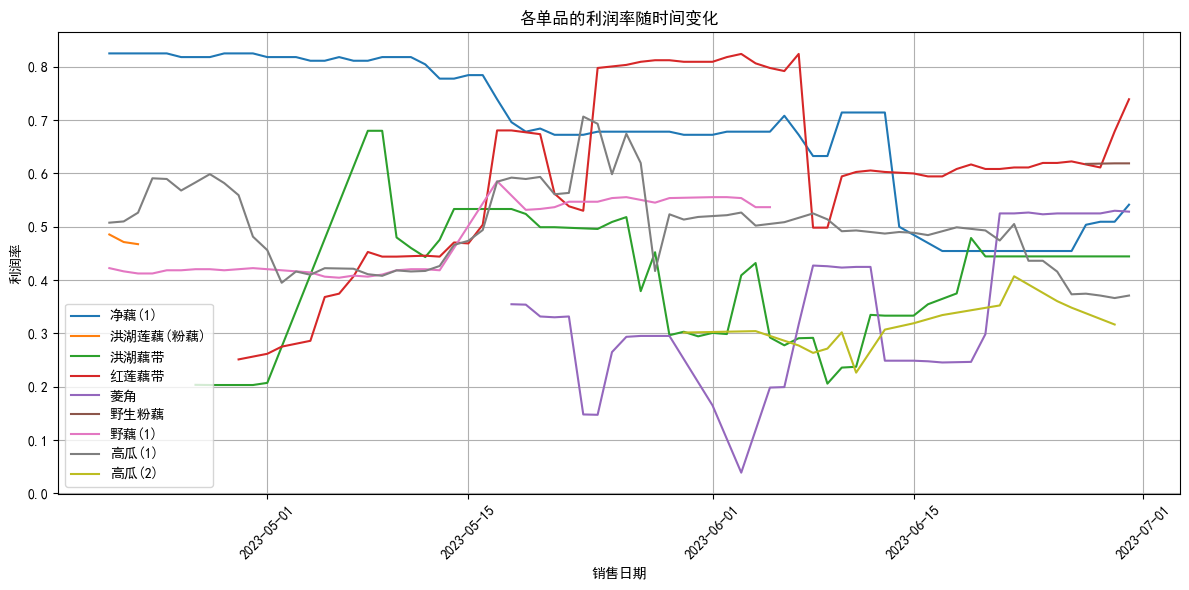

In [475]:
data = data_1_cleaned
# 按单品名称分组，并绘制各单品的利润率随时间变化的折线图
plt.figure(figsize=(12, 6))
for product, product_data in data.groupby('单品名称'):
    plt.plot(product_data['销售日期'], product_data['利润率'], label=product)

plt.xlabel('销售日期')
plt.ylabel('利润率')
plt.title('各单品的利润率随时间变化')
plt.legend(loc='best')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

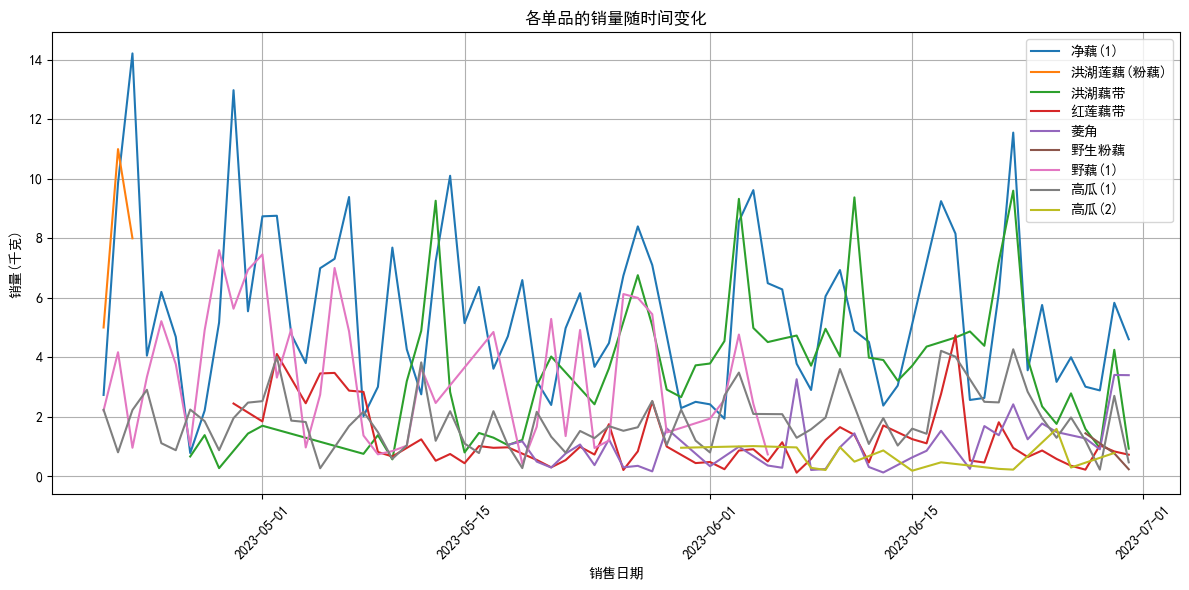

In [477]:
# 按单品名称分组，并绘制各单品的利润率随时间变化的折线图
plt.figure(figsize=(12, 6))
for product, product_data in data.groupby('单品名称'):
    plt.plot(product_data['销售日期'], product_data['销量(千克)'], label=product)

plt.xlabel('销售日期')
plt.ylabel('销量(千克)')
plt.title('各单品的销量随时间变化')
plt.legend(loc='best')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 计算日均利润率和日销售量

### 1. 算数平均值 

In [407]:
# 设置销售日期列为索引
data.set_index('销售日期', inplace=True)
data

,单品名称,利润率,销量(千克),利润
销售日期,,,,
2023-04-20,净藕(1),0.825095,2.731,2.253335
2023-04-21,净藕(1),0.825095,9.851,8.128011
2023-04-22,净藕(1),0.825095,14.219,11.732027
2023-04-23,净藕(1),0.825095,4.053,3.344110
2023-04-24,净藕(1),0.825095,6.197,5.113114
...,...,...,...,...
2023-06-21,高瓜(2),0.352494,0.244,0.086008
2023-06-22,高瓜(2),0.407212,0.219,0.089179
2023-06-25,高瓜(2),0.360544,1.589,0.572905


In [409]:
# 按日对销售数据进行汇总
daily_sales = data['销量(千克)'].resample('D').sum()  # 计算每日总销量
daily_avg_profit_margin = data['利润率'].resample('D').mean()  # 计算每日平均利润率

# 创建新的DataFrame包含日销量和日平均利润率
data = pd.DataFrame({'日销量(千克)': daily_sales, '日平均利润率': daily_avg_profit_margin})
data = data.dropna()

In [410]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 2023-04-20 to 2023-06-30
Freq: D
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   日销量(千克)  72 non-null     float64
 1   日平均利润率   72 non-null     float64
dtypes: float64(2)
memory usage: 1.7 KB
None
         日销量(千克)     日平均利润率
count  72.000000  72.000000
mean   10.532694   0.517297
std     4.587785   0.098087
min     3.678000   0.347500
25%     7.277750   0.440908
50%     9.200000   0.501461
75%    13.306000   0.593554
max    28.057000   0.818182


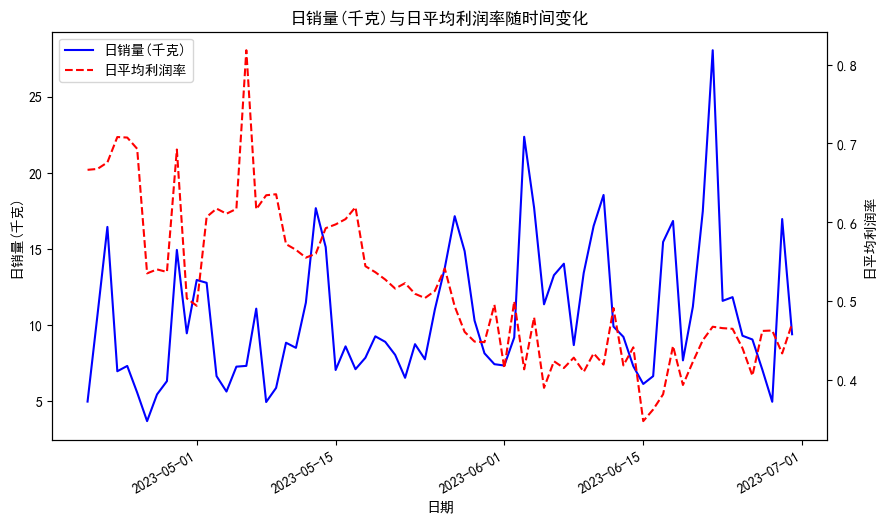

In [411]:
# 创建一个包含两个子图的图形
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制日销量(千克)的折线图
ax.plot(data.index, data['日销量(千克)'], label='日销量(千克)', color='blue', linestyle='-')

# 创建第二个y轴用于绘制日平均利润率
ax2 = ax.twinx()  # 创建第二个y轴
ax2.plot(data.index, data['日平均利润率'], label='日平均利润率', color='red', linestyle='--')

# 设置轴标签
ax.set_xlabel('日期')
ax.set_ylabel('日销量(千克)')
ax2.set_ylabel('日平均利润率')

# 添加图例
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# 标题
plt.title('日销量(千克)与日平均利润率随时间变化')

# 自动调整日期刻度格式
fig.autofmt_xdate()

# 显示图形
plt.show()


### 2.加权平均值 

In [461]:
# 根据销售日期分组
grouped = data.groupby(data['销售日期'].dt.date)

# 计算每天的总利润和总销量
daily_total_profit = grouped['利润'].sum()
daily_total_sales = grouped['销量(千克)'].sum()

# 计算每个订单的利润率乘以每单订单的总利润占总利润的比率
weighted_profit_rate = (data['利润率'] * data['利润']) / daily_total_profit.loc[data['销售日期'].dt.date].values

# 计算每日平均利润率和日销量(千克)
daily_avg_profit_rate = grouped.apply(lambda x: (x['利润率'] * x['利润']).sum() / daily_total_profit.loc[x['销售日期'].dt.date].values[0])
daily_total_sales = daily_total_sales.reindex(daily_avg_profit_rate.index)

# 创建包含每日平均利润率和日销量(千克)的DataFrame
daily_data = pd.DataFrame({'日平均利润率': daily_avg_profit_rate, '日销量(千克)': daily_total_sales})

# 打印结果或进一步处理
print(daily_data)


              日平均利润率  日销量(千克)
销售日期                         
2022-06-30  0.513462   10.625
2022-07-01  0.538529   15.086
2022-07-02  0.588887   28.667
2022-07-03  0.527909   37.873
2022-07-04  0.535107   20.219
...              ...      ...
2023-06-26  0.433225    9.044
2023-06-27  0.478099    7.062
2023-06-28  0.496704    4.949
2023-06-29  0.474665   16.961
2023-06-30  0.522419    9.388

[354 rows x 2 columns]


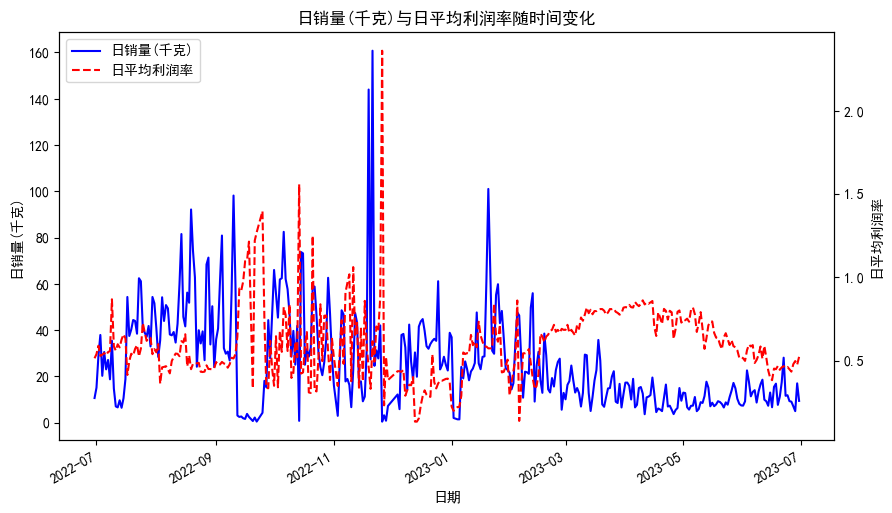

In [462]:
# 创建一个包含两个子图的图形
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制日销量(千克)的折线图
ax.plot(daily_data.index, daily_data['日销量(千克)'], label='日销量(千克)', color='blue', linestyle='-')

# 创建第二个y轴用于绘制日平均利润率
ax2 = ax.twinx()  # 创建第二个y轴
ax2.plot(daily_data.index, daily_data['日平均利润率'], label='日平均利润率', color='red', linestyle='--')

# 设置轴标签
ax.set_xlabel('日期')
ax.set_ylabel('日销量(千克)')
ax2.set_ylabel('日平均利润率')

# 添加图例
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# 标题
plt.title('日销量(千克)与日平均利润率随时间变化')

# 自动调整日期刻度格式
fig.autofmt_xdate()

# 显示图形
plt.show()

In [463]:
data = daily_data

### 3.按销售量加权 

In [478]:
# 根据销售日期分组
grouped = data.groupby(data_1_cleaned['销售日期'].dt.date)

# 计算每天的总销量和总利润
daily_total_sales = grouped['销量(千克)'].sum()
daily_total_profit = grouped['利润'].sum()

# 计算每个订单的利润率乘以每单订单的销量占总销量的比率
weighted_profit_rate = (data['利润率'] * data['销量(千克)']) / daily_total_sales.loc[data['销售日期'].dt.date].values

# 计算每日平均利润率
daily_avg_profit_rate = grouped.apply(lambda x: (x['利润率'] * x['销量(千克)']).sum() / daily_total_sales.loc[x['销售日期'].dt.date].values[0])

# 创建包含每日平均利润率和每日销量(千克)的DataFrame
daily_data = pd.DataFrame({'日平均利润率': daily_avg_profit_rate, '日销量(千克)': daily_total_sales})


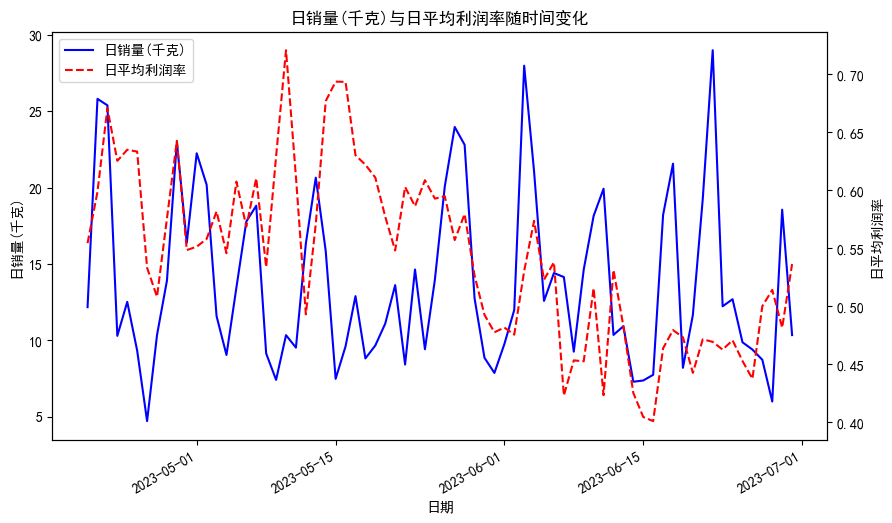

In [479]:
# 创建一个包含两个子图的图形
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制日销量(千克)的折线图
ax.plot(daily_data.index, daily_data['日销量(千克)'], label='日销量(千克)', color='blue', linestyle='-')

# 创建第二个y轴用于绘制日平均利润率
ax2 = ax.twinx()  # 创建第二个y轴
ax2.plot(daily_data.index, daily_data['日平均利润率'], label='日平均利润率', color='red', linestyle='--')

# 设置轴标签
ax.set_xlabel('日期')
ax.set_ylabel('日销量(千克)')
ax2.set_ylabel('日平均利润率')

# 添加图例
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# 标题
plt.title('日销量(千克)与日平均利润率随时间变化')

# 自动调整日期刻度格式
fig.autofmt_xdate()

# 显示图形
plt.show()

In [480]:
data = daily_data

### 线性回归 

In [481]:
from sklearn.linear_model import LinearRegression

回归方程: 日销量 = -12.86 * 日平均利润率 + 17.18


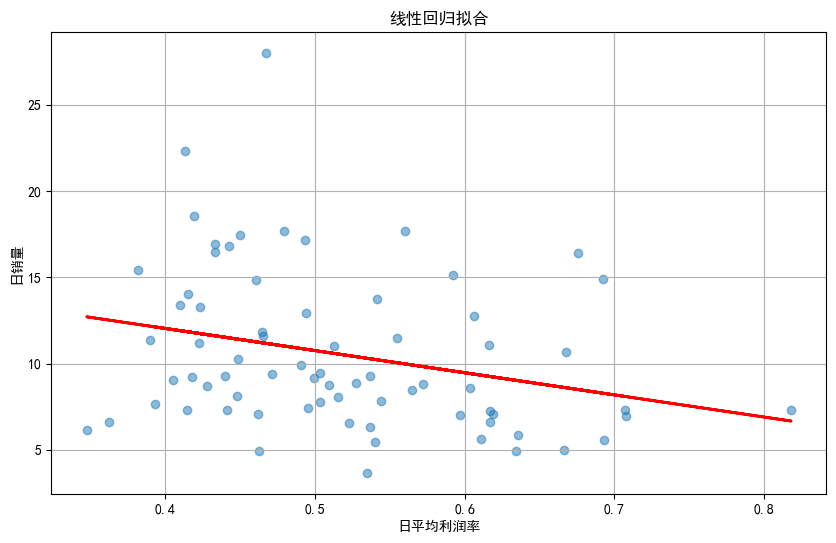

R-squared值: 0.08


In [412]:
# 使用线性回归拟合模型
X = data['日平均利润率'].values.reshape(-1, 1)
y = data['日销量(千克)'].values

# 创建线性回归模型
model = LinearRegression()

# 拟合模型
model.fit(X, y)

# 提取回归系数和截距
slope = model.coef_[0]
intercept = model.intercept_

# 打印回归方程
print(f"回归方程: 日销量 = {slope:.2f} * 日平均利润率 + {intercept:.2f}")

# 绘制散点图和回归线
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5)
plt.plot(X, model.predict(X), color='red', linewidth=2)
plt.xlabel('日平均利润率')
plt.ylabel('日销量')
plt.title('线性回归拟合')
plt.grid(True)
plt.show()

# 计算R-squared值
r_squared = model.score(X, y)

print(f"R-squared值: {r_squared:.2f}")

### 非线性回归

In [413]:
from scipy.optimize import curve_fit

模型参数: a = -2.97, b = -9.60, c = 16.32
回归方程: y = -2.97x^2 + -9.60x + 16.32


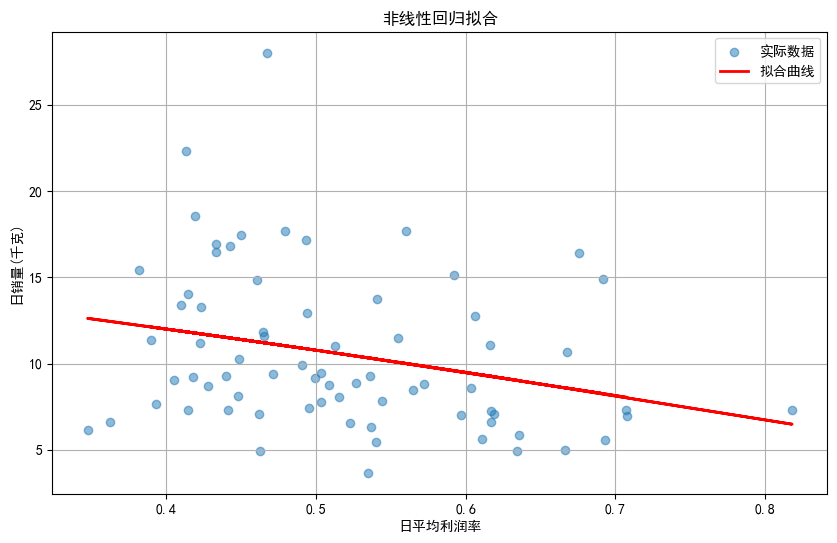

In [414]:
# 定义非线性模型函数（例如，二次多项式）
def nonlinear_model(x, a, b, c):
    return a * x**2 + b * x + c

data = data.reset_index()
# 将日期转换为序数以便于拟合
data['日期序数'] = (data['销售日期'] - data['销售日期'].min()).dt.days

# 使用curve_fit拟合非线性模型
params, covariance = curve_fit(nonlinear_model, data['日平均利润率'], data['日销量(千克)'])

# 提取模型参数
a, b, c = params

# 打印模型参数
print(f"模型参数: a = {a:.2f}, b = {b:.2f}, c = {c:.2f}")

# 打印回归方程
print(f"回归方程: y = {a:.2f}x^2 + {b:.2f}x + {c:.2f}")


# 绘制散点图和拟合曲线
plt.figure(figsize=(10, 6))
plt.scatter(data['日平均利润率'], data['日销量(千克)'], alpha=0.5, label='实际数据')
plt.plot(data['日平均利润率'], nonlinear_model(data['日平均利润率'], a, b, c), color='red', linewidth=2, label='拟合曲线')
plt.xlabel('日平均利润率')
plt.ylabel('日销量(千克)')
plt.title('非线性回归拟合')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [415]:
from sklearn.metrics import mean_squared_error
import math

# 使用模型预测销量
predicted_sales = nonlinear_model(data['日平均利润率'], a, b, c)

# 计算均方根误差（RMSE）
rmse = math.sqrt(mean_squared_error(data['日销量(千克)'], predicted_sales))

print(f"均方根误差 (RMSE): {rmse:.2f}")

均方根误差 (RMSE): 4.38


### 时间序列回归 

In [437]:
# 指定滞后期数
lag_periods = 5
# 替换成你希望使用的滞后期数

# 创建滞后数据列
for lag in range(1, lag_periods + 1):
    data[f'日销量(千克)_lag{lag}'] = data['日销量(千克)'].shift(lag)
    data[f'日平均利润率_lag{lag}'] = data['日平均利润率'].shift(lag)

# 计算滞后相关系数
lag_correlations = data.corr()

# 打印滞后相关系数矩阵
print("滞后相关系数矩阵:")
print(lag_correlations[['日销量(千克)', '日平均利润率']])

滞后相关系数矩阵:
               日销量(千克)    日平均利润率
日销量(千克)       1.000000 -0.226949
日平均利润率       -0.226949  1.000000
日销量(千克)_lag1  0.395576 -0.242608
日平均利润率_lag1  -0.278236  0.907873
日销量(千克)_lag2  0.037277 -0.245018
日平均利润率_lag2  -0.369815  0.823037
日销量(千克)_lag3 -0.052748 -0.275751
日平均利润率_lag3  -0.367894  0.816531
日销量(千克)_lag4 -0.068791 -0.405697
日平均利润率_lag4  -0.340015  0.822890
日销量(千克)_lag5 -0.136849 -0.423303
日平均利润率_lag5  -0.337552  0.798285


C:\Users\79311\AppData\Local\Temp\ipykernel_133960\3654778279.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'日销量(千克)_lag{lag}'] = data['日销量(千克)'].shift(lag)
C:\Users\79311\AppData\Local\Temp\ipykernel_133960\3654778279.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'日平均利润率_lag{lag}'] = data['日平均利润率'].shift(lag)


In [438]:
import pandas as pd
import statsmodels.api as sm

In [482]:
data.reset_index()

,销售日期,日平均利润率,日销量(千克)
0,2023-04-20,0.554353,12.171
1,2023-04-21,0.598664,25.820
2,2023-04-22,0.670768,25.397
3,2023-04-23,0.625318,10.291
4,2023-04-24,0.634922,12.517
...,...,...,...
67,2023-06-26,0.437480,9.393
68,2023-06-27,0.500017,8.721
69,2023-06-28,0.514109,5.986
70,2023-06-29,0.481532,18.558


In [483]:
#data['销售日期'] = pd.to_datetime(data['销售日期'])
data.set_index('销售日期', inplace=True)

KeyError: "None of ['销售日期'] are in the columns"

In [484]:
selected_col = ['日销量(千克)','日平均利润率']
data = data[selected_col]

In [485]:
model = sm.tsa.VAR(data)
result = model.fit()

D:\Ananconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [486]:
print(result.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 09, Sep, 2023
Time:                     11:35:59
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -2.36863
Nobs:                     71.0000    HQIC:                  -2.48380
Log likelihood:          -104.615    FPE:                  0.0773246
AIC:                     -2.55984    Det(Omega_mle):       0.0711821
--------------------------------------------------------------------
Results for equation 日销量(千克)
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const             12.409993         4.795620            2.588           0.010
L1.日销量(千克)         0.372597         0.112946            3.299           0.001
L1.日平均利润率         -6.875304         8.494597           -0.809         

未来一周的日销量和日平均利润率预测：
              日销量(千克)    日平均利润率
2023-07-01  12.575095  0.534427
2023-07-02  13.421088  0.535035
2023-07-03  13.732122  0.536269
2023-07-04  13.839529  0.537482
2023-07-05  13.871209  0.538492
2023-07-06  13.876066  0.539281
2023-07-07  13.872453  0.539878


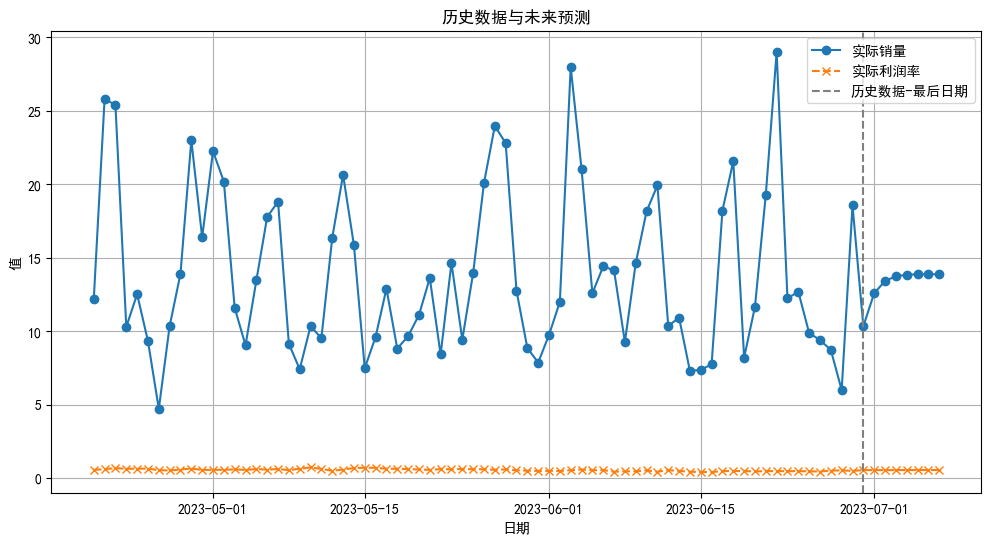

In [487]:
# 定义未来一周的日期范围
end_date = data.index[-1]  # 获取最后一个日期
start_date = end_date + pd.DateOffset(1)  # 从最后一个日期的下一天开始
forecast_end_date = end_date + pd.DateOffset(7)  # 未来一周的最后一天

# 生成未来一周的日期范围
date_range = pd.date_range(start=start_date, end=forecast_end_date, freq='D')

# 创建一个DataFrame来存储未来预测值
forecast_df = pd.DataFrame(index=date_range, columns=data.columns)

# 进行未来一周的预测
model_fitted = model.fit(lag_order)
forecast = model_fitted.forecast(y=data.values[-lag_order:], steps=7)

# 将预测值填充到DataFrame中
forecast_df.loc[date_range, :] = forecast

# 打印未来一周的预测值
print("未来一周的日销量和日平均利润率预测：")
print(forecast_df)

# 合并历史数据和预测数据
combined_data = pd.concat([data, forecast_df])

# 绘制时间序列图
plt.figure(figsize=(12, 6))
plt.plot(combined_data.index, combined_data['日销量(千克)'], label='实际销量', marker='o', linestyle='-')
plt.plot(combined_data.index, combined_data['日平均利润率'], label='实际利润率', marker='x', linestyle='--')
plt.axvline(x=end_date, color='gray', linestyle='--', label='历史数据-最后日期')
plt.xlabel('日期')
plt.ylabel('值')
plt.legend()
plt.title('历史数据与未来预测')
plt.grid(True)
plt.show()

In [488]:
# 查找滞后期数
lag_order = result.k_ar
print(f"滞后期数：{lag_order}")

# 查找VAR模型的系数矩阵
coefficients = result.coefs
print("系数矩阵：")
for i in range(lag_order):
    print(f"Lag {i+1}:\n{coefficients[i]}")

# 写出VAR模型的一般形式
general_form = f"Y_t = {' + '.join([f'A{i+1} * Y_t-{i+1}' for i in range(lag_order)])} + u_t"
print(f"VAR模型的一般形式：\n{general_form}")

滞后期数：1
系数矩阵：
Lag 1:
[[ 3.72596995e-01 -6.87530363e+00]
 [ 9.17967631e-04  7.51765973e-01]]
VAR模型的一般形式：
Y_t = A1 * Y_t-1 + u_t


模型预测和评估： 使用模型的预测来评估拟合效果。可以将模型的预测与实际数据进行比较，并使用均方根误差（RMSE）或其他指标来衡量模型的预测性能。

In [489]:
from sklearn.metrics import mean_squared_error
import math

# 使用模型进行预测
lag_order = result.k_ar
forecast = result.forecast(data.values[-lag_order:], steps=10)  # 预测未来10个时间步

# 实际值
actual_values = data[-10:]

# 计算RMSE
rmse = math.sqrt(mean_squared_error(actual_values, forecast))
print(f"RMSE: {rmse:.2f}")

RMSE: 4.75


模型诊断图： 可以绘制VAR模型的残差诊断图，以检查残差是否满足模型假设。如果残差显示出自相关性、异方差性等问题，可能需要进一步改进模型。

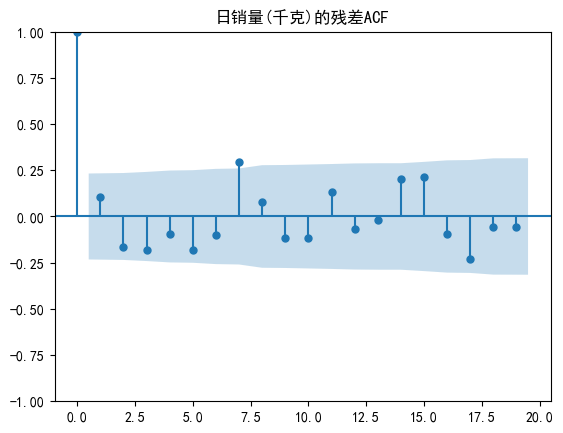

In [490]:
from statsmodels.graphics.tsaplots import plot_acf

# 选择一个变量进行ACF图的绘制
var_variable = '日销量(千克)'  # 替换为你要检查的变量名称
plot_acf(result.resid[var_variable])
plt.title(f'{var_variable}的残差ACF')
plt.show()

残差统计检验： 使用统计检验来检查残差是否符合正态分布。常见的方法包括Ljung-Box检验和正态性检验。

In [49]:
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import normaltest
residuals = result.resid

# Ljung-Box检验
lb, p_value = acorr_ljungbox(residuals, lags=10)
print(f"Ljung-Box统计量: {lb}")
print(f"P值: {p_value}")

# 正态性检验
stat, p_value = normaltest(residuals)
print(f"正态性检验统计量: {stat}")
print(f"P值: {p_value}")

ValueError: x is required to have ndim 1 but has ndim 2

### 相关性矩阵 

In [67]:
sales = data['日销量(千克)']
profit_margin = data['日平均利润率']

# 使用pandas的corr()函数计算相关性矩阵
correlation_matrix = data.corr()

# 打印相关性矩阵
print(correlation_matrix)

          日销量(千克)    日平均利润率
日销量(千克)  1.000000  0.328354
日平均利润率   0.328354  1.000000


# 花叶类

In [35]:
grouped_data = data_2.groupby('单品名称').agg({'单品名称': 'count', '销量(千克)': 'sum'})
grouped_data.columns = ['出现次数', '总销售量(千克)']
sorted_data = grouped_data.sort_values(by='出现次数', ascending=False)
sorted_data

,出现次数,总销售量(千克)
单品名称,,
云南生菜(份),11569,11586.000
保康高山大白菜,6258,6380.895
云南油麦菜(份),6198,6199.000
奶白菜(份),5884,5898.000
娃娃菜,4830,4840.000
...,...,...
紫贝菜,6,1.003
田七,4,1.187
丝瓜尖,3,1.266


C:\Users\79311\AppData\Local\Temp\ipykernel_95596\374716528.py:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


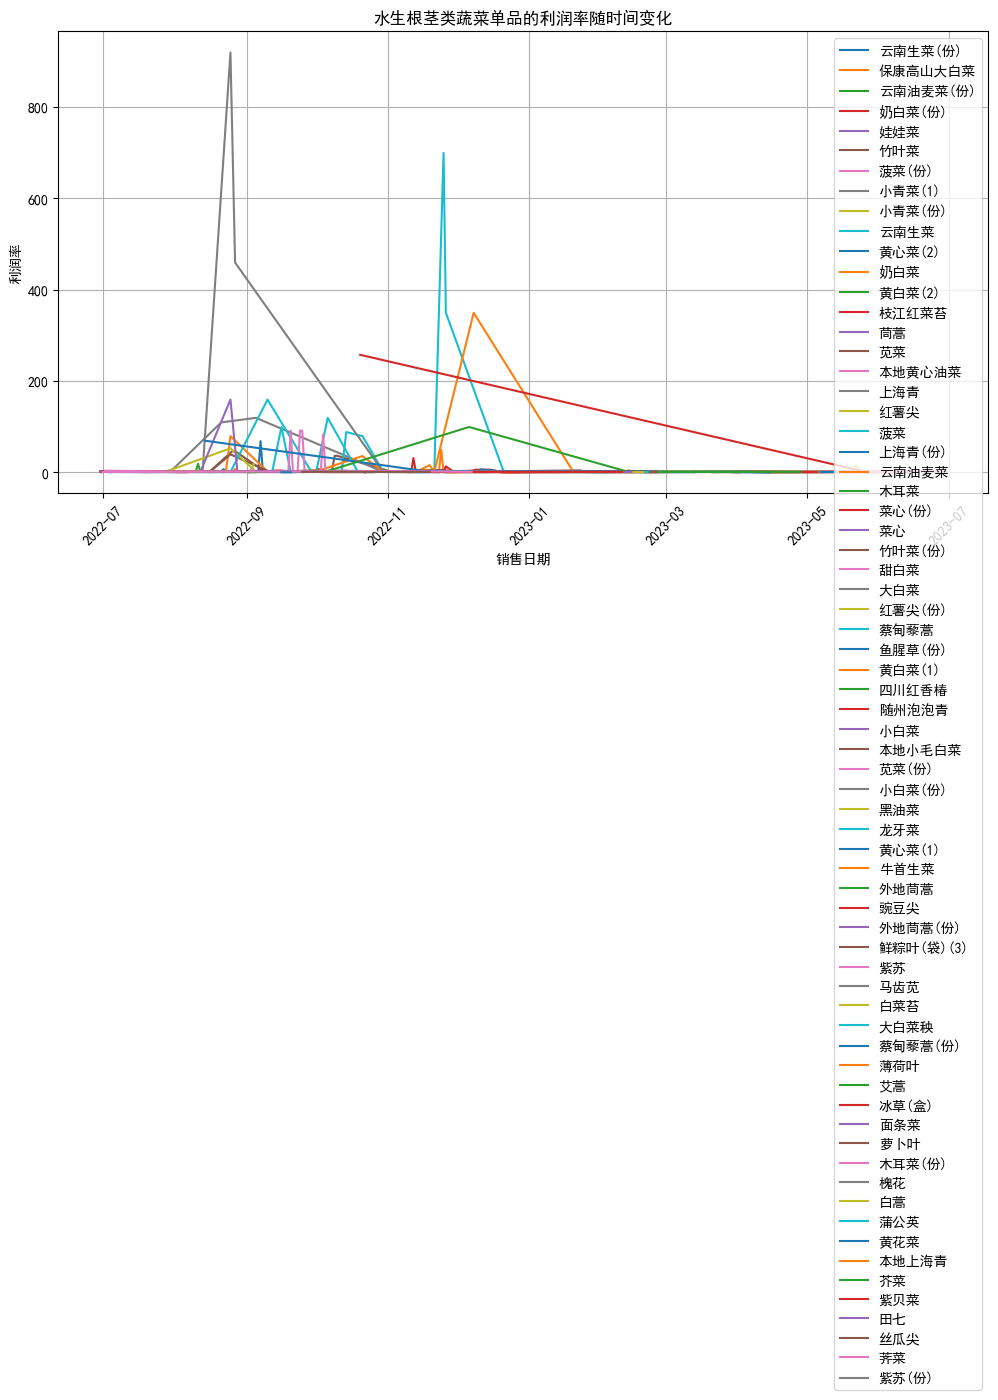

In [36]:
# 创建一个包含日期和利润率的DataFrame
profit_data = data_2[data_2['单品名称'].isin(sorted_data.index)][['销售日期', '单品名称', '利润率']]

# 绘制折线图
plt.figure(figsize=(12, 6))
for product in sorted_data.index:
    product_data = profit_data[profit_data['单品名称'] == product]
    plt.plot(product_data['销售日期'], product_data['利润率'], label=product)

plt.xlabel('销售日期')
plt.ylabel('利润率')
plt.title('水生根茎类蔬菜单品的利润率随时间变化')
plt.legend(loc='best')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [37]:
data_2.describe()

,销量(千克),销售单价(元/千克),批发价格(元/千克),平均损耗率,利润率
count,93209.000000,93209.000000,93209.000000,9.320900e+04,93209.000000
mean,0.747491,5.477741,3.231372,1.283000e+01,1.233629
std,0.348293,3.730011,2.583919,6.862103e-12,12.566761
min,0.013000,1.400000,0.010000,1.283000e+01,-0.542857
25%,0.437000,3.500000,1.890000,1.283000e+01,0.507937
50%,0.911000,4.500000,2.630000,1.283000e+01,0.724138
75%,1.000000,6.800000,4.030000,1.283000e+01,1.053571
max,30.000000,119.900000,65.410000,1.283000e+01,919.000000


In [38]:
# 定义一个函数来删除每个单品的异常值
def remove_outliers(group):
    q1 = group['利润率'].quantile(0.25)
    q3 = group['利润率'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return group[(group['利润率'] >= lower_bound) & (group['利润率'] <= upper_bound)]

# 使用groupby将数据按照单品名称分组，并应用remove_outliers函数
data_1_cleaned = data_2.groupby('单品名称').apply(remove_outliers)
#除去利润率大于200的数据
data_1_cleaned = data_1_cleaned[data_1_cleaned['利润率'] <= 200]


# 重置索引以获得处理后的DataFrame
data_1_cleaned = data_1_cleaned.reset_index(drop=True)

data_1_cleaned.describe()

,销量(千克),销售单价(元/千克),批发价格(元/千克),平均损耗率,利润率
count,89576.000000,89576.000000,89576.000000,8.957600e+04,89576.000000
mean,0.749492,5.485558,3.273931,1.283000e+01,0.857386
std,0.348453,3.629269,2.555703,1.016259e-11,0.559670
min,0.013000,1.400000,0.440000,1.283000e+01,-0.178947
25%,0.440000,3.500000,1.927500,1.283000e+01,0.503759
50%,0.939000,4.500000,2.670000,1.283000e+01,0.711027
75%,1.000000,6.800000,4.090000,1.283000e+01,1.008929
max,30.000000,85.600000,65.360000,1.283000e+01,4.272727


C:\Users\79311\AppData\Local\Temp\ipykernel_95596\2560244089.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


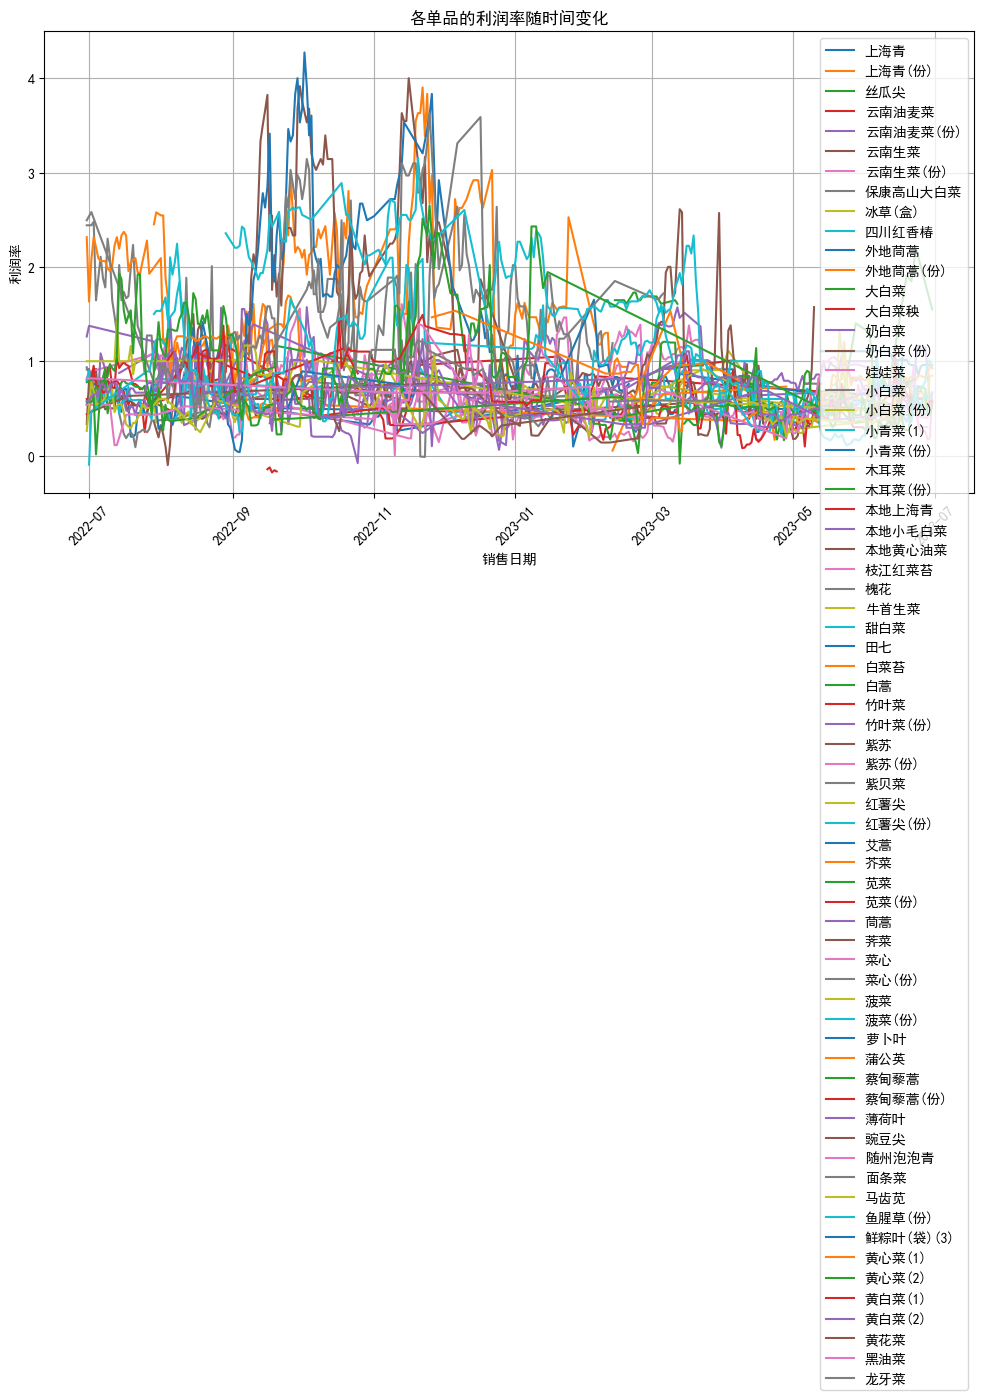

In [39]:
# 按单品名称分组，并绘制各单品的利润率随时间变化的折线图
plt.figure(figsize=(12, 6))
for product, product_data in data_1_cleaned.groupby('单品名称'):
    plt.plot(product_data['销售日期'], product_data['利润率'], label=product)

plt.xlabel('销售日期')
plt.ylabel('利润率')
plt.title('各单品的利润率随时间变化')
plt.legend(loc='best')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [41]:
# 将销售日期列转换为日期类型
data_1_cleaned['销售日期'] = pd.to_datetime(data_1['销售日期'])

# 设置销售日期列为索引
data_1_cleaned.set_index('销售日期', inplace=True)


# 按日对销售数据进行汇总
daily_sales = data_1_cleaned['销量(千克)'].resample('D').sum()  # 计算每日总销量
daily_avg_profit_margin = data_1_cleaned['利润率'].resample('D').mean()  # 计算每日平均利润率

# 创建新的DataFrame包含日销量和日平均利润率
data = pd.DataFrame({'日销量(千克)': daily_sales, '日平均利润率': daily_avg_profit_margin})
data = data.dropna()

In [42]:
data['销售日期'] = pd.to_datetime(data['销售日期'])
data.set_index('销售日期', inplace=True)

KeyError: '销售日期'

In [43]:
model = sm.tsa.VAR(data)
result = model.fit()

D:\Ananconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [44]:
print(result.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 09, Sep, 2023
Time:                     01:32:14
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    3.71711
Nobs:                     358.000    HQIC:                   3.67794
Log likelihood:          -1663.68    FPE:                    38.5547
AIC:                      3.65208    Det(Omega_mle):         37.9166
--------------------------------------------------------------------
Results for equation 日销量(千克)
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const             12.943951         4.146683            3.122           0.002
L1.日销量(千克)         0.543256         0.044478           12.214           0.000
L1.日平均利润率         10.779373         4.485549            2.403         

In [45]:
from sklearn.metrics import mean_squared_error
import math

# 使用模型进行预测
lag_order = result.k_ar
forecast = result.forecast(data.values[-lag_order:], steps=10)  # 预测未来10个时间步

# 实际值
actual_values = data[-10:]

# 计算RMSE
rmse = math.sqrt(mean_squared_error(actual_values, forecast))
print(f"RMSE: {rmse:.2f}")

RMSE: 13.17


# 花菜类

In [46]:
grouped_data = data_3.groupby('单品名称').agg({'单品名称': 'count', '销量(千克)': 'sum'})
grouped_data.columns = ['出现次数', '总销售量(千克)']
sorted_data = grouped_data.sort_values(by='出现次数', ascending=False)
sorted_data

,出现次数,总销售量(千克)
单品名称,,
西兰花,19329,9050.589
枝江青梗散花,10752,5055.691
青梗散花,181,115.881


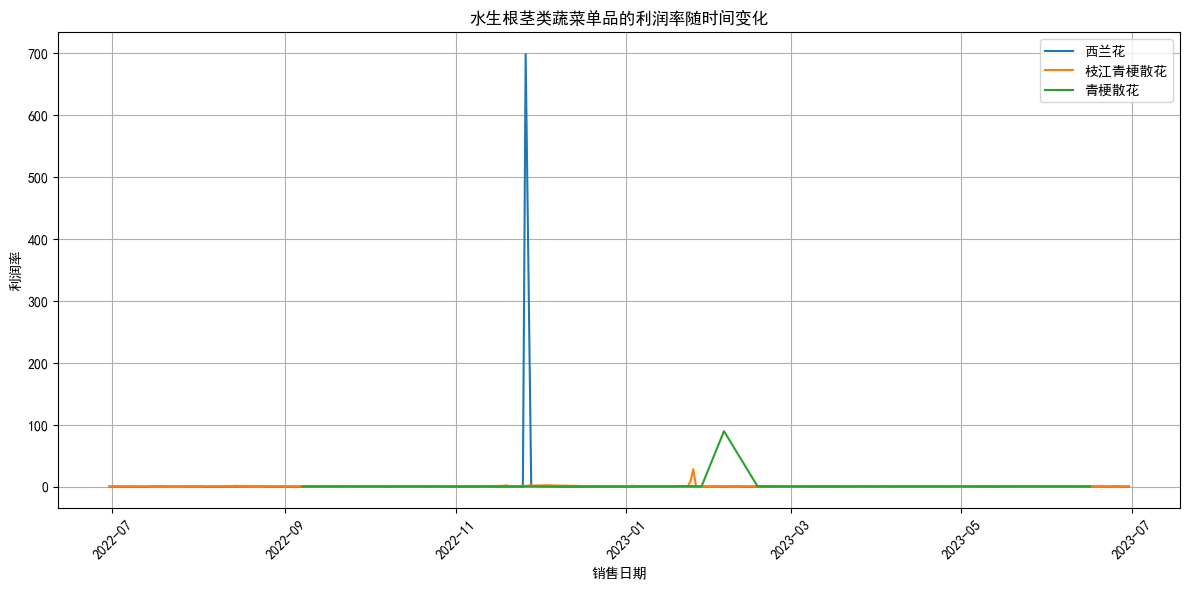

In [47]:
# 创建一个包含日期和利润率的DataFrame
profit_data = data_3[data_3['单品名称'].isin(sorted_data.index)][['销售日期', '单品名称', '利润率']]

# 绘制折线图
plt.figure(figsize=(12, 6))
for product in sorted_data.index:
    product_data = profit_data[profit_data['单品名称'] == product]
    plt.plot(product_data['销售日期'], product_data['利润率'], label=product)

plt.xlabel('销售日期')
plt.ylabel('利润率')
plt.title('水生根茎类蔬菜单品的利润率随时间变化')
plt.legend(loc='best')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [48]:
# 定义一个函数来删除每个单品的异常值
def remove_outliers(group):
    q1 = group['利润率'].quantile(0.25)
    q3 = group['利润率'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return group[(group['利润率'] >= lower_bound) & (group['利润率'] <= upper_bound)]

# 使用groupby将数据按照单品名称分组，并应用remove_outliers函数
data_1_cleaned = data_3.groupby('单品名称').apply(remove_outliers)
#除去利润率大于200的数据
data_1_cleaned = data_1_cleaned[data_1_cleaned['利润率'] <= 200]


# 重置索引以获得处理后的DataFrame
data_1_cleaned = data_1_cleaned.reset_index(drop=True)

data_1_cleaned.describe()

,销量(千克),销售单价(元/千克),批发价格(元/千克),平均损耗率,利润率
count,29718.000000,29718.000000,29718.000000,2.971800e+04,29718.000000
mean,0.470196,9.519079,6.034635,1.551000e+01,0.631552
std,0.173869,2.427616,1.866326,6.014845e-12,0.274035
min,0.100000,4.800000,1.740000,1.551000e+01,0.000000
25%,0.357000,8.000000,4.700000,1.551000e+01,0.452282
50%,0.427000,9.200000,5.980000,1.551000e+01,0.577287
75%,0.535000,12.000000,7.540000,1.551000e+01,0.735358
max,1.940000,15.200000,10.800000,1.551000e+01,1.758621


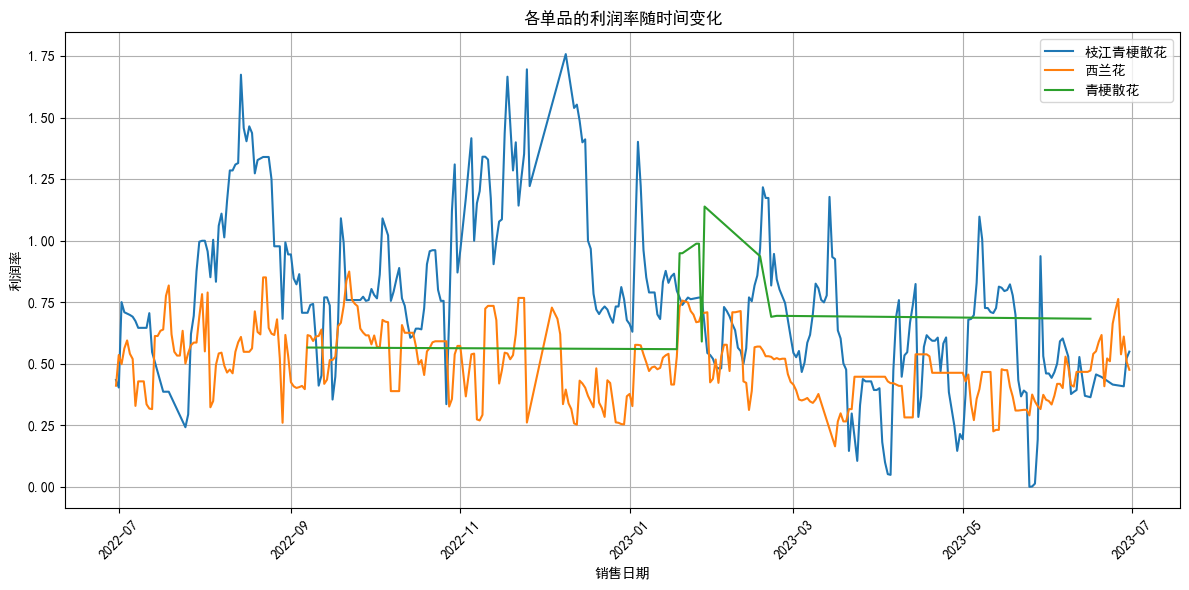

In [49]:
# 按单品名称分组，并绘制各单品的利润率随时间变化的折线图
plt.figure(figsize=(12, 6))
for product, product_data in data_1_cleaned.groupby('单品名称'):
    plt.plot(product_data['销售日期'], product_data['利润率'], label=product)

plt.xlabel('销售日期')
plt.ylabel('利润率')
plt.title('各单品的利润率随时间变化')
plt.legend(loc='best')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [50]:
# 将销售日期列转换为日期类型
data_1_cleaned['销售日期'] = pd.to_datetime(data_1['销售日期'])

# 设置销售日期列为索引
data_1_cleaned.set_index('销售日期', inplace=True)


# 按日对销售数据进行汇总
daily_sales = data_1_cleaned['销量(千克)'].resample('D').sum()  # 计算每日总销量
daily_avg_profit_margin = data_1_cleaned['利润率'].resample('D').mean()  # 计算每日平均利润率

# 创建新的DataFrame包含日销量和日平均利润率
data = pd.DataFrame({'日销量(千克)': daily_sales, '日平均利润率': daily_avg_profit_margin})
data = data.dropna()

In [51]:
model = sm.tsa.VAR(data)
result = model.fit()
print(result.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 09, Sep, 2023
Time:                     01:36:04
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    1.12000
Nobs:                     358.000    HQIC:                   1.08083
Log likelihood:          -1198.80    FPE:                    2.87187
AIC:                      1.05496    Det(Omega_mle):         2.82434
--------------------------------------------------------------------
Results for equation 日销量(千克)
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const              5.065285         2.186959            2.316           0.021
L1.日销量(千克)         0.536301         0.044483           12.056           0.000
L1.日平均利润率         11.347001         3.185204            3.562         

D:\Ananconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [52]:
from sklearn.metrics import mean_squared_error
import math

# 使用模型进行预测
lag_order = result.k_ar
forecast = result.forecast(data.values[-lag_order:], steps=10)  # 预测未来10个时间步

# 实际值
actual_values = data[-10:]

# 计算RMSE
rmse = math.sqrt(mean_squared_error(actual_values, forecast))
print(f"RMSE: {rmse:.2f}")

RMSE: 7.56


# 茄类

In [53]:
grouped_data = data_4.groupby('单品名称').agg({'单品名称': 'count', '销量(千克)': 'sum'})
grouped_data.columns = ['出现次数', '总销售量(千克)']
sorted_data = grouped_data.sort_values(by='出现次数', ascending=False)
sorted_data

,出现次数,总销售量(千克)
单品名称,,
紫茄子(2),7574,3838.940
长线茄,1241,509.662
青茄子(1),1064,572.211
紫茄子(1),589,287.753
青茄子(2),510,184.126
圆茄子(2),242,121.297
圆茄子(1),12,4.981
花茄子,6,2.884
紫圆茄,1,0.509


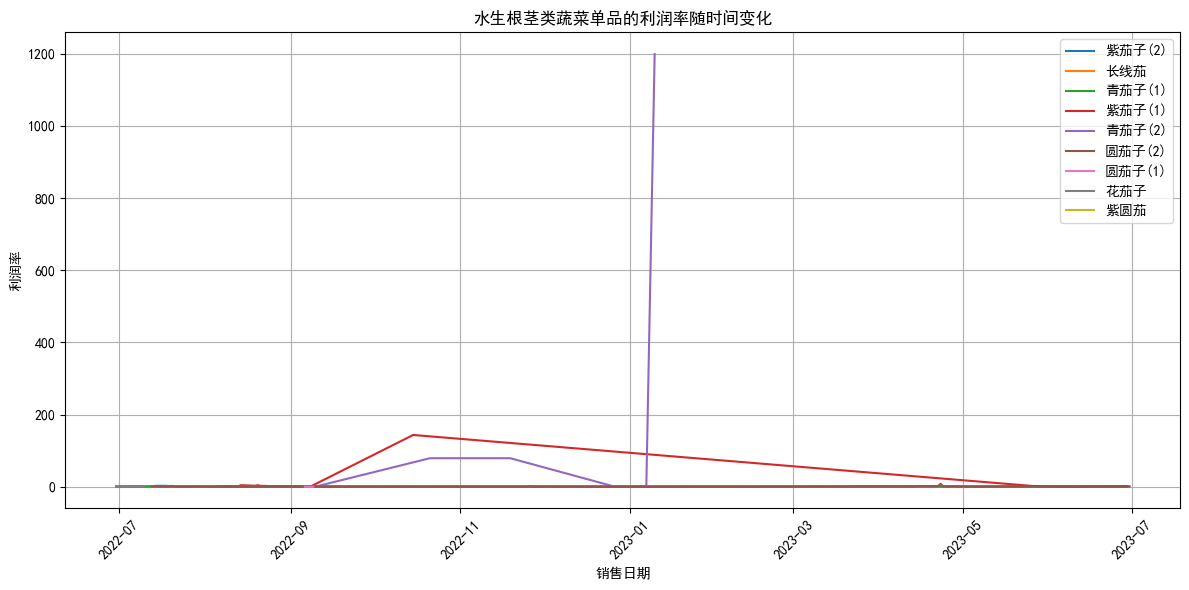

In [54]:
# 创建一个包含日期和利润率的DataFrame
profit_data = data_4[data_4['单品名称'].isin(sorted_data.index)][['销售日期', '单品名称', '利润率']]

# 绘制折线图
plt.figure(figsize=(12, 6))
for product in sorted_data.index:
    product_data = profit_data[profit_data['单品名称'] == product]
    plt.plot(product_data['销售日期'], product_data['利润率'], label=product)

plt.xlabel('销售日期')
plt.ylabel('利润率')
plt.title('水生根茎类蔬菜单品的利润率随时间变化')
plt.legend(loc='best')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [57]:
# 定义一个函数来删除每个单品的异常值
def remove_outliers(group):
    q1 = group['利润率'].quantile(0.25)
    q3 = group['利润率'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return group[(group['利润率'] >= lower_bound) & (group['利润率'] <= upper_bound)]

# 使用groupby将数据按照单品名称分组，并应用remove_outliers函数
data_1_cleaned = data_4.groupby('单品名称').apply(remove_outliers)
#除去利润率大于200的数据
data_1_cleaned = data_1_cleaned[data_1_cleaned['利润率'] <= 200]


# 重置索引以获得处理后的DataFrame
data_1_cleaned = data_1_cleaned.reset_index(drop=True)

data_1_cleaned.describe()

,销量(千克),销售单价(元/千克),批发价格(元/千克),平均损耗率,利润率
count,10718.000000,10718.000000,10718.000000,1.071800e+04,10718.000000
mean,0.491672,9.148946,5.656643,6.680000e+00,0.666207
std,0.249340,2.764096,1.856260,3.455175e-13,0.449207
min,0.086000,3.000000,1.000000,6.680000e+00,-0.159935
25%,0.344000,7.000000,4.170000,6.680000e+00,0.477833
50%,0.455000,8.000000,5.130000,6.680000e+00,0.580882
75%,0.577000,12.000000,7.010000,6.680000e+00,0.734104
max,12.500000,16.000000,10.720000,6.680000e+00,13.000000


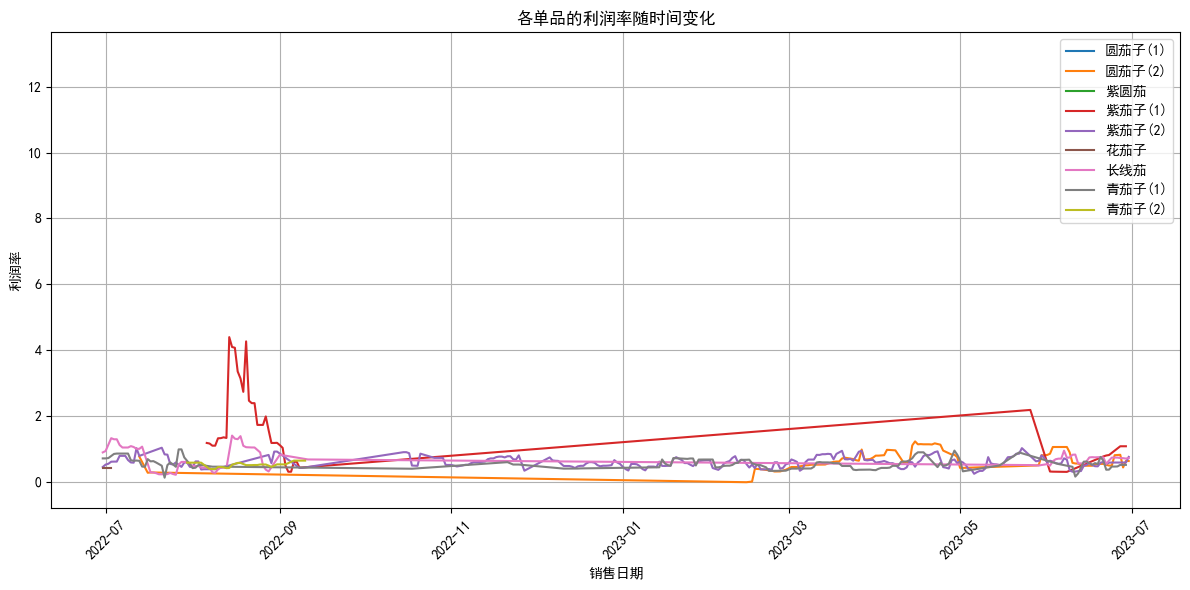

In [58]:
# 按单品名称分组，并绘制各单品的利润率随时间变化的折线图
plt.figure(figsize=(12, 6))
for product, product_data in data_1_cleaned.groupby('单品名称'):
    plt.plot(product_data['销售日期'], product_data['利润率'], label=product)

plt.xlabel('销售日期')
plt.ylabel('利润率')
plt.title('各单品的利润率随时间变化')
plt.legend(loc='best')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [59]:
# 将销售日期列转换为日期类型
data_1_cleaned['销售日期'] = pd.to_datetime(data_1['销售日期'])

# 设置销售日期列为索引
data_1_cleaned.set_index('销售日期', inplace=True)


# 按日对销售数据进行汇总
daily_sales = data_1_cleaned['销量(千克)'].resample('D').sum()  # 计算每日总销量
daily_avg_profit_margin = data_1_cleaned['利润率'].resample('D').mean()  # 计算每日平均利润率

# 创建新的DataFrame包含日销量和日平均利润率
data = pd.DataFrame({'日销量(千克)': daily_sales, '日平均利润率': daily_avg_profit_margin})
data = data.dropna()

In [60]:
model = sm.tsa.VAR(data)
result = model.fit()
print(result.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 09, Sep, 2023
Time:                     01:39:27
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    2.90129
Nobs:                     142.000    HQIC:                   2.82715
Log likelihood:          -594.103    FPE:                    16.0612
AIC:                      2.77639    Det(Omega_mle):         15.4035
--------------------------------------------------------------------
Results for equation 日销量(千克)
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const             17.717105         3.632021            4.878           0.000
L1.日销量(千克)         0.562140         0.069607            8.076           0.000
L1.日平均利润率         -2.164089         3.091588           -0.700         

D:\Ananconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [61]:
from sklearn.metrics import mean_squared_error
import math

# 使用模型进行预测
lag_order = result.k_ar
forecast = result.forecast(data.values[-lag_order:], steps=10)  # 预测未来10个时间步

# 实际值
actual_values = data[-10:]

# 计算RMSE
rmse = math.sqrt(mean_squared_error(actual_values, forecast))
print(f"RMSE: {rmse:.2f}")

RMSE: 13.70


# 辣椒类